In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pygeostat as gs
from RBFN import *
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and preparing data

In [25]:
wl = gs.DataFile('data/walker.csv')

In [26]:
wl.drop(columns=['Id','U','T'])

In [27]:
wl.head()

,X,Y,V
0,11.0,8.0,0.0
1,8.0,30.0,0.0
2,9.0,48.0,224.4
3,8.0,69.0,434.4
4,9.0,90.0,412.1


In [28]:
wl['Z'] = np.zeros(len(wl))
wl.z = 'Z'

In [29]:
wl.head()

,X,Y,V,Z
0,11.0,8.0,0.0,0.0
1,8.0,30.0,0.0,0.0
2,9.0,48.0,224.4,0.0
3,8.0,69.0,434.4,0.0
4,9.0,90.0,412.1,0.0


In [30]:
data_coords = wl[['X','Y','Z']]

# Settinng parameters and creating RBFN object

In [31]:
n_clus = 70

In [32]:
centers = KMeans(n_clusters=n_clus).fit(data_coords).cluster_centers_

In [33]:
rbf_n = RBFN(cluster_centers=centers)

Sigma value set
Random weights set


In [34]:
rbf_n.random_bias()

Random bias: 0.2583582886924798


In [35]:
grid = wl.infergriddef(blksize=(5,5,1))
grid_coords = grid.get_coordinates()
grid_coords = np.array([grid_coords[0], grid_coords[1], grid_coords[2]]).T

# Predicting with random weights

In [36]:
predict = rbf_n.predict(grid_coords)

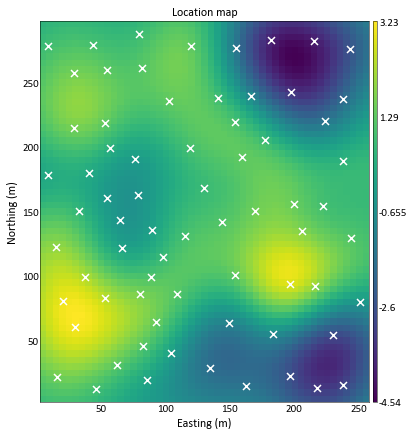

In [37]:
f, a = plt.subplots(1, 1, figsize=(7,7))
_ = gs.slice_plot(predict, griddef=grid, ax=a, title='Location map')
a.scatter(centers.T[0], centers.T[1], marker='x', color='white')

# Training

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_coords, wl['V'], test_size=0.33)

Epoch: 0 
 loss: 43793824.142706156
Epoch: 500 
 loss: 6834620.145776075
Epoch: 1000 
 loss: 6319640.870212397
Epoch: 1500 
 loss: 6065350.897640946


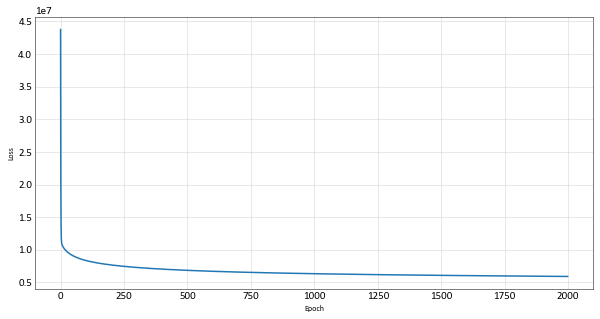

In [39]:
rbf_n.train(2000, X_train, y_train, learning_rate_w=-0.001)

In [40]:
predict_after_train = rbf_n.predict(grid_coords)

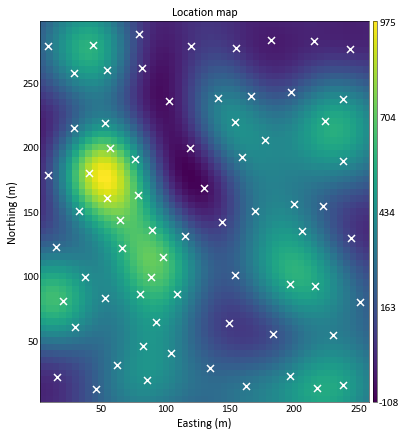

In [41]:
f, a = plt.subplots(1, 1, figsize=(7,7))
_ = gs.slice_plot(predict_after_train, griddef=grid, ax=a, title='Location map')
a.scatter(centers.T[0], centers.T[1], marker='x', color='white')

# Validating

In [42]:
predict_test = rbf_n.predict(X_test)

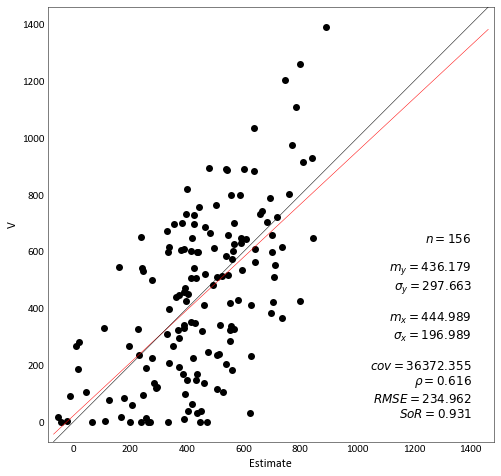

In [43]:
_  = gs.validation_plot(predict_test, y_test)